In [1]:
%config Completer.use_jedi = False
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sb


df = pd.read_csv("BW.csv")

kf = StratifiedKFold(n_splits=10)

data = np.array(df.iloc[:,0:3])
classes = np.array(df['result'])

fold = 0
train_acc = 0
test_acc = 0
    
for train, test in kf.split(data,classes):
    fold+=1
    print(f"Fold #{fold}")
    data_train =  data[train]
    data_test = data[test]
    train_labels1 = classes[train]
    test_labels1 = classes[test]

    
    train_labels = pd.get_dummies(train_labels1, prefix="result")
    test_labels = pd.get_dummies(test_labels1, prefix="result")
    
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (3,1)),
        keras.layers.Dense(5,activation='sigmoid'),
        keras.layers.Dense(5,activation='sigmoid'),
        keras.layers.Dense(3,activation='sigmoid')
        ])
    
    learning_rate = 0.001
    opt = optimizers.Adam(learning_rate)
    
    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"] )
    with tf.device('/CPU:0'):    
        history = model.fit(data_train,train_labels, epochs=200, validation_data = (data_test, test_labels))
    
    print("\nTrain split:")
    train_loss, train_accuracy = model.evaluate(data_train, train_labels, verbose= 1)
    print("Accuracy : {}".format(train_accuracy))
    
    print("\nTest split:")
    test_loss, test_accuracy = model.evaluate(data_test, test_labels, verbose= 2)
    print("Accuracy : {}".format(test_accuracy))
    

    train_acc = train_acc + train_accuracy
    test_acc = test_acc + test_accuracy


print("\nThe final train accuracy is:{} ".format(train_acc/10))
print("\nThe final test accuracy is:{} ".format(test_acc/10))

Fold #1
Epoch 1/200
636/636 [==============================] - 0s 695us/step - loss: 1.0564 - accuracy: 0.4456 - val_loss: 1.0340 - val_accuracy: 0.4588
Epoch 2/200
636/636 [==============================] - 0s 518us/step - loss: 1.0092 - accuracy: 0.5127 - val_loss: 0.9993 - val_accuracy: 0.5177
Epoch 3/200
636/636 [==============================] - 0s 498us/step - loss: 0.9871 - accuracy: 0.5320 - val_loss: 0.9922 - val_accuracy: 0.5301
Epoch 4/200
636/636 [==============================] - 0s 510us/step - loss: 0.9828 - accuracy: 0.5298 - val_loss: 0.9898 - val_accuracy: 0.5305
Epoch 5/200
636/636 [==============================] - 0s 485us/step - loss: 0.9805 - accuracy: 0.5309 - val_loss: 0.9883 - val_accuracy: 0.5310
Epoch 6/200
636/636 [==============================] - 0s 534us/step - loss: 0.9787 - accuracy: 0.5303 - val_loss: 0.9867 - val_accuracy: 0.5305
Epoch 7/200
636/636 [==============================] - 0s 485us/step - loss: 0.9775 - accuracy: 0.5311 - val_loss: 0.9856 

636/636 [==============================] - 0s 508us/step - loss: 0.9720 - accuracy: 0.5314 - val_loss: 0.9819 - val_accuracy: 0.5199
Epoch 58/200
636/636 [==============================] - 0s 500us/step - loss: 0.9720 - accuracy: 0.5311 - val_loss: 0.9820 - val_accuracy: 0.5274
Epoch 59/200
636/636 [==============================] - 0s 534us/step - loss: 0.9719 - accuracy: 0.5307 - val_loss: 0.9822 - val_accuracy: 0.5186
Epoch 60/200
636/636 [==============================] - 0s 509us/step - loss: 0.9720 - accuracy: 0.5309 - val_loss: 0.9821 - val_accuracy: 0.5181
Epoch 61/200
636/636 [==============================] - 0s 500us/step - loss: 0.9720 - accuracy: 0.5314 - val_loss: 0.9819 - val_accuracy: 0.5230
Epoch 62/200
636/636 [==============================] - 0s 528us/step - loss: 0.9719 - accuracy: 0.5318 - val_loss: 0.9821 - val_accuracy: 0.5199
Epoch 63/200
636/636 [==============================] - 0s 516us/step - loss: 0.9720 - accuracy: 0.5305 - val_loss: 0.9819 - val_accuracy

636/636 [==============================] - 0s 486us/step - loss: 0.9718 - accuracy: 0.5300 - val_loss: 0.9819 - val_accuracy: 0.5252
Epoch 114/200
636/636 [==============================] - 0s 529us/step - loss: 0.9717 - accuracy: 0.5325 - val_loss: 0.9824 - val_accuracy: 0.5283
Epoch 115/200
636/636 [==============================] - 0s 491us/step - loss: 0.9716 - accuracy: 0.5315 - val_loss: 0.9823 - val_accuracy: 0.5283
Epoch 116/200
636/636 [==============================] - 0s 498us/step - loss: 0.9716 - accuracy: 0.5317 - val_loss: 0.9824 - val_accuracy: 0.5212
Epoch 117/200
636/636 [==============================] - 0s 498us/step - loss: 0.9720 - accuracy: 0.5314 - val_loss: 0.9822 - val_accuracy: 0.5208
Epoch 118/200
636/636 [==============================] - 0s 500us/step - loss: 0.9717 - accuracy: 0.5328 - val_loss: 0.9820 - val_accuracy: 0.5243
Epoch 119/200
636/636 [==============================] - 0s 503us/step - loss: 0.9716 - accuracy: 0.5315 - val_loss: 0.9833 - val_ac

636/636 [==============================] - 0s 505us/step - loss: 0.9714 - accuracy: 0.5315 - val_loss: 0.9825 - val_accuracy: 0.5190
Epoch 169/200
636/636 [==============================] - 0s 500us/step - loss: 0.9716 - accuracy: 0.5310 - val_loss: 0.9822 - val_accuracy: 0.5239
Epoch 170/200
636/636 [==============================] - 0s 500us/step - loss: 0.9717 - accuracy: 0.5317 - val_loss: 0.9821 - val_accuracy: 0.5248
Epoch 171/200
636/636 [==============================] - 0s 527us/step - loss: 0.9714 - accuracy: 0.5321 - val_loss: 0.9830 - val_accuracy: 0.5265
Epoch 172/200
636/636 [==============================] - 0s 491us/step - loss: 0.9719 - accuracy: 0.5310 - val_loss: 0.9821 - val_accuracy: 0.5208
Epoch 173/200
636/636 [==============================] - 0s 500us/step - loss: 0.9715 - accuracy: 0.5311 - val_loss: 0.9824 - val_accuracy: 0.5252
Epoch 174/200
636/636 [==============================] - 0s 523us/step - loss: 0.9717 - accuracy: 0.5317 - val_loss: 0.9827 - val_ac

Epoch 21/200
636/636 [==============================] - 0s 486us/step - loss: 0.9742 - accuracy: 0.5305 - val_loss: 0.9733 - val_accuracy: 0.5327
Epoch 22/200
636/636 [==============================] - 0s 509us/step - loss: 0.9739 - accuracy: 0.5294 - val_loss: 0.9729 - val_accuracy: 0.5358
Epoch 23/200
636/636 [==============================] - 0s 513us/step - loss: 0.9738 - accuracy: 0.5301 - val_loss: 0.9729 - val_accuracy: 0.5363
Epoch 24/200
636/636 [==============================] - 0s 500us/step - loss: 0.9739 - accuracy: 0.5295 - val_loss: 0.9731 - val_accuracy: 0.5385
Epoch 25/200
636/636 [==============================] - 0s 500us/step - loss: 0.9737 - accuracy: 0.5304 - val_loss: 0.9732 - val_accuracy: 0.5381
Epoch 26/200
636/636 [==============================] - 0s 529us/step - loss: 0.9737 - accuracy: 0.5299 - val_loss: 0.9732 - val_accuracy: 0.5358
Epoch 27/200
636/636 [==============================] - 0s 490us/step - loss: 0.9736 - accuracy: 0.5304 - val_loss: 0.9729 -

636/636 [==============================] - 0s 532us/step - loss: 0.9729 - accuracy: 0.5302 - val_loss: 0.9735 - val_accuracy: 0.5336
Epoch 78/200
636/636 [==============================] - 0s 515us/step - loss: 0.9729 - accuracy: 0.5297 - val_loss: 0.9731 - val_accuracy: 0.5332
Epoch 79/200
636/636 [==============================] - 0s 520us/step - loss: 0.9729 - accuracy: 0.5299 - val_loss: 0.9733 - val_accuracy: 0.5363
Epoch 80/200
636/636 [==============================] - 0s 500us/step - loss: 0.9727 - accuracy: 0.5296 - val_loss: 0.9738 - val_accuracy: 0.5350
Epoch 81/200
636/636 [==============================] - 0s 534us/step - loss: 0.9727 - accuracy: 0.5302 - val_loss: 0.9742 - val_accuracy: 0.5372
Epoch 82/200
636/636 [==============================] - 0s 514us/step - loss: 0.9727 - accuracy: 0.5300 - val_loss: 0.9729 - val_accuracy: 0.5341
Epoch 83/200
636/636 [==============================] - 0s 495us/step - loss: 0.9727 - accuracy: 0.5302 - val_loss: 0.9734 - val_accuracy

Epoch 133/200
636/636 [==============================] - 0s 510us/step - loss: 0.9723 - accuracy: 0.5305 - val_loss: 0.9745 - val_accuracy: 0.5341
Epoch 134/200
636/636 [==============================] - 0s 501us/step - loss: 0.9725 - accuracy: 0.5299 - val_loss: 0.9734 - val_accuracy: 0.5363
Epoch 135/200
636/636 [==============================] - 0s 539us/step - loss: 0.9727 - accuracy: 0.5294 - val_loss: 0.9733 - val_accuracy: 0.5363
Epoch 136/200
636/636 [==============================] - 0s 546us/step - loss: 0.9727 - accuracy: 0.5295 - val_loss: 0.9739 - val_accuracy: 0.5354
Epoch 137/200
636/636 [==============================] - 0s 544us/step - loss: 0.9728 - accuracy: 0.5307 - val_loss: 0.9739 - val_accuracy: 0.5336
Epoch 138/200
636/636 [==============================] - 0s 498us/step - loss: 0.9724 - accuracy: 0.5296 - val_loss: 0.9739 - val_accuracy: 0.5372
Epoch 139/200
636/636 [==============================] - 0s 512us/step - loss: 0.9726 - accuracy: 0.5303 - val_loss: 0

Epoch 189/200
636/636 [==============================] - 0s 534us/step - loss: 0.9723 - accuracy: 0.5309 - val_loss: 0.9746 - val_accuracy: 0.5358
Epoch 190/200
636/636 [==============================] - 0s 504us/step - loss: 0.9725 - accuracy: 0.5298 - val_loss: 0.9743 - val_accuracy: 0.5363
Epoch 191/200
636/636 [==============================] - 0s 505us/step - loss: 0.9722 - accuracy: 0.5295 - val_loss: 0.9754 - val_accuracy: 0.5341
Epoch 192/200
636/636 [==============================] - 0s 524us/step - loss: 0.9724 - accuracy: 0.5308 - val_loss: 0.9735 - val_accuracy: 0.5345
Epoch 193/200
636/636 [==============================] - 0s 500us/step - loss: 0.9725 - accuracy: 0.5300 - val_loss: 0.9738 - val_accuracy: 0.5332
Epoch 194/200
636/636 [==============================] - 0s 545us/step - loss: 0.9724 - accuracy: 0.5300 - val_loss: 0.9745 - val_accuracy: 0.5381
Epoch 195/200
636/636 [==============================] - 0s 500us/step - loss: 0.9724 - accuracy: 0.5304 - val_loss: 0

636/636 [==============================] - 0s 498us/step - loss: 0.9703 - accuracy: 0.5315 - val_loss: 0.9996 - val_accuracy: 0.5228
Epoch 44/200
636/636 [==============================] - 0s 540us/step - loss: 0.9701 - accuracy: 0.5320 - val_loss: 0.9995 - val_accuracy: 0.5219
Epoch 45/200
636/636 [==============================] - 0s 519us/step - loss: 0.9699 - accuracy: 0.5322 - val_loss: 1.0001 - val_accuracy: 0.5215
Epoch 46/200
636/636 [==============================] - 0s 511us/step - loss: 0.9699 - accuracy: 0.5329 - val_loss: 1.0006 - val_accuracy: 0.5206
Epoch 47/200
636/636 [==============================] - 0s 526us/step - loss: 0.9701 - accuracy: 0.5315 - val_loss: 1.0015 - val_accuracy: 0.5206
Epoch 48/200
636/636 [==============================] - 0s 526us/step - loss: 0.9701 - accuracy: 0.5319 - val_loss: 0.9994 - val_accuracy: 0.5228
Epoch 49/200
636/636 [==============================] - 0s 519us/step - loss: 0.9701 - accuracy: 0.5311 - val_loss: 0.9992 - val_accuracy

636/636 [==============================] - 0s 502us/step - loss: 0.9695 - accuracy: 0.5322 - val_loss: 0.9994 - val_accuracy: 0.5219
Epoch 100/200
636/636 [==============================] - 0s 519us/step - loss: 0.9696 - accuracy: 0.5311 - val_loss: 0.9993 - val_accuracy: 0.5219
Epoch 101/200
636/636 [==============================] - 0s 500us/step - loss: 0.9694 - accuracy: 0.5320 - val_loss: 1.0002 - val_accuracy: 0.5219
Epoch 102/200
636/636 [==============================] - 0s 498us/step - loss: 0.9695 - accuracy: 0.5319 - val_loss: 0.9998 - val_accuracy: 0.5219
Epoch 103/200
636/636 [==============================] - 0s 506us/step - loss: 0.9695 - accuracy: 0.5315 - val_loss: 1.0002 - val_accuracy: 0.5219
Epoch 104/200
636/636 [==============================] - 0s 492us/step - loss: 0.9695 - accuracy: 0.5320 - val_loss: 0.9995 - val_accuracy: 0.5215
Epoch 105/200
636/636 [==============================] - 0s 500us/step - loss: 0.9697 - accuracy: 0.5314 - val_loss: 0.9997 - val_ac

Epoch 155/200
636/636 [==============================] - 0s 498us/step - loss: 0.9693 - accuracy: 0.5327 - val_loss: 1.0006 - val_accuracy: 0.5232
Epoch 156/200
636/636 [==============================] - 0s 507us/step - loss: 0.9693 - accuracy: 0.5322 - val_loss: 0.9998 - val_accuracy: 0.5219
Epoch 157/200
636/636 [==============================] - 0s 490us/step - loss: 0.9693 - accuracy: 0.5329 - val_loss: 1.0003 - val_accuracy: 0.5210
Epoch 158/200
636/636 [==============================] - 0s 500us/step - loss: 0.9693 - accuracy: 0.5315 - val_loss: 1.0011 - val_accuracy: 0.5206
Epoch 159/200
636/636 [==============================] - 0s 483us/step - loss: 0.9694 - accuracy: 0.5324 - val_loss: 1.0006 - val_accuracy: 0.5215
Epoch 160/200
636/636 [==============================] - 0s 500us/step - loss: 0.9694 - accuracy: 0.5322 - val_loss: 0.9997 - val_accuracy: 0.5224
Epoch 161/200
636/636 [==============================] - 0s 498us/step - loss: 0.9691 - accuracy: 0.5322 - val_loss: 1

Epoch 9/200
636/636 [==============================] - 0s 499us/step - loss: 0.9778 - accuracy: 0.5330 - val_loss: 1.0058 - val_accuracy: 0.5108
Epoch 10/200
636/636 [==============================] - 0s 524us/step - loss: 0.9764 - accuracy: 0.5341 - val_loss: 1.0060 - val_accuracy: 0.5135
Epoch 11/200
636/636 [==============================] - 0s 498us/step - loss: 0.9755 - accuracy: 0.5340 - val_loss: 1.0049 - val_accuracy: 0.5100
Epoch 12/200
636/636 [==============================] - 0s 523us/step - loss: 0.9748 - accuracy: 0.5327 - val_loss: 1.0047 - val_accuracy: 0.5077
Epoch 13/200
636/636 [==============================] - 0s 499us/step - loss: 0.9741 - accuracy: 0.5345 - val_loss: 1.0044 - val_accuracy: 0.5108
Epoch 14/200
636/636 [==============================] - 0s 493us/step - loss: 0.9738 - accuracy: 0.5331 - val_loss: 1.0045 - val_accuracy: 0.5131
Epoch 15/200
636/636 [==============================] - 0s 523us/step - loss: 0.9734 - accuracy: 0.5332 - val_loss: 1.0037 - 

636/636 [==============================] - 0s 499us/step - loss: 0.9702 - accuracy: 0.5318 - val_loss: 1.0023 - val_accuracy: 0.5086
Epoch 66/200
636/636 [==============================] - 0s 522us/step - loss: 0.9704 - accuracy: 0.5313 - val_loss: 1.0024 - val_accuracy: 0.5113
Epoch 67/200
636/636 [==============================] - 0s 500us/step - loss: 0.9700 - accuracy: 0.5329 - val_loss: 1.0021 - val_accuracy: 0.5086
Epoch 68/200
636/636 [==============================] - 0s 522us/step - loss: 0.9701 - accuracy: 0.5315 - val_loss: 1.0028 - val_accuracy: 0.5095
Epoch 69/200
636/636 [==============================] - 0s 500us/step - loss: 0.9701 - accuracy: 0.5321 - val_loss: 1.0028 - val_accuracy: 0.5113
Epoch 70/200
636/636 [==============================] - 0s 542us/step - loss: 0.9701 - accuracy: 0.5328 - val_loss: 1.0026 - val_accuracy: 0.5073
Epoch 71/200
636/636 [==============================] - 0s 534us/step - loss: 0.9700 - accuracy: 0.5340 - val_loss: 1.0021 - val_accuracy

636/636 [==============================] - 0s 499us/step - loss: 0.9696 - accuracy: 0.5327 - val_loss: 1.0016 - val_accuracy: 0.5122
Epoch 122/200
636/636 [==============================] - 0s 498us/step - loss: 0.9696 - accuracy: 0.5335 - val_loss: 1.0014 - val_accuracy: 0.5144
Epoch 123/200
636/636 [==============================] - 0s 550us/step - loss: 0.9695 - accuracy: 0.5331 - val_loss: 1.0018 - val_accuracy: 0.5082
Epoch 124/200
636/636 [==============================] - 0s 537us/step - loss: 0.9696 - accuracy: 0.5327 - val_loss: 1.0019 - val_accuracy: 0.5122
Epoch 125/200
636/636 [==============================] - 0s 480us/step - loss: 0.9694 - accuracy: 0.5326 - val_loss: 1.0017 - val_accuracy: 0.5126
Epoch 126/200
636/636 [==============================] - 0s 524us/step - loss: 0.9697 - accuracy: 0.5323 - val_loss: 1.0013 - val_accuracy: 0.5108
Epoch 127/200
636/636 [==============================] - 0s 499us/step - loss: 0.9696 - accuracy: 0.5329 - val_loss: 1.0021 - val_ac

Epoch 177/200
636/636 [==============================] - 0s 534us/step - loss: 0.9692 - accuracy: 0.5324 - val_loss: 1.0016 - val_accuracy: 0.5117
Epoch 178/200
636/636 [==============================] - 0s 486us/step - loss: 0.9695 - accuracy: 0.5326 - val_loss: 1.0009 - val_accuracy: 0.5095
Epoch 179/200
636/636 [==============================] - 0s 500us/step - loss: 0.9695 - accuracy: 0.5317 - val_loss: 1.0008 - val_accuracy: 0.5095
Epoch 180/200
636/636 [==============================] - 0s 498us/step - loss: 0.9694 - accuracy: 0.5328 - val_loss: 1.0013 - val_accuracy: 0.5095
Epoch 181/200
636/636 [==============================] - 0s 523us/step - loss: 0.9693 - accuracy: 0.5342 - val_loss: 1.0012 - val_accuracy: 0.5100
Epoch 182/200
636/636 [==============================] - 0s 510us/step - loss: 0.9695 - accuracy: 0.5325 - val_loss: 1.0010 - val_accuracy: 0.5131
Epoch 183/200
636/636 [==============================] - 0s 508us/step - loss: 0.9694 - accuracy: 0.5330 - val_loss: 1

Epoch 30/200
636/636 [==============================] - 0s 525us/step - loss: 0.9719 - accuracy: 0.5311 - val_loss: 0.9881 - val_accuracy: 0.5241
Epoch 31/200
636/636 [==============================] - 0s 494us/step - loss: 0.9718 - accuracy: 0.5305 - val_loss: 0.9878 - val_accuracy: 0.5272
Epoch 32/200
636/636 [==============================] - 0s 498us/step - loss: 0.9716 - accuracy: 0.5308 - val_loss: 0.9879 - val_accuracy: 0.5272
Epoch 33/200
636/636 [==============================] - 0s 523us/step - loss: 0.9715 - accuracy: 0.5308 - val_loss: 0.9893 - val_accuracy: 0.5215
Epoch 34/200
636/636 [==============================] - 0s 499us/step - loss: 0.9717 - accuracy: 0.5300 - val_loss: 0.9879 - val_accuracy: 0.5272
Epoch 35/200
636/636 [==============================] - 0s 498us/step - loss: 0.9716 - accuracy: 0.5307 - val_loss: 0.9885 - val_accuracy: 0.5237
Epoch 36/200
636/636 [==============================] - 0s 498us/step - loss: 0.9716 - accuracy: 0.5314 - val_loss: 0.9878 -

636/636 [==============================] - 0s 499us/step - loss: 0.9713 - accuracy: 0.5309 - val_loss: 0.9879 - val_accuracy: 0.5263
Epoch 87/200
636/636 [==============================] - 0s 498us/step - loss: 0.9714 - accuracy: 0.5314 - val_loss: 0.9879 - val_accuracy: 0.5268
Epoch 88/200
636/636 [==============================] - 0s 498us/step - loss: 0.9712 - accuracy: 0.5319 - val_loss: 0.9886 - val_accuracy: 0.5232
Epoch 89/200
636/636 [==============================] - 0s 529us/step - loss: 0.9714 - accuracy: 0.5311 - val_loss: 0.9883 - val_accuracy: 0.5228
Epoch 90/200
636/636 [==============================] - 0s 491us/step - loss: 0.9713 - accuracy: 0.5318 - val_loss: 0.9882 - val_accuracy: 0.5237
Epoch 91/200
636/636 [==============================] - 0s 498us/step - loss: 0.9712 - accuracy: 0.5318 - val_loss: 0.9882 - val_accuracy: 0.5259
Epoch 92/200
636/636 [==============================] - 0s 498us/step - loss: 0.9713 - accuracy: 0.5323 - val_loss: 0.9878 - val_accuracy

Epoch 142/200
636/636 [==============================] - 0s 483us/step - loss: 0.9710 - accuracy: 0.5313 - val_loss: 0.9890 - val_accuracy: 0.5215
Epoch 143/200
636/636 [==============================] - 0s 499us/step - loss: 0.9712 - accuracy: 0.5313 - val_loss: 0.9881 - val_accuracy: 0.5255
Epoch 144/200
636/636 [==============================] - 0s 498us/step - loss: 0.9709 - accuracy: 0.5308 - val_loss: 0.9885 - val_accuracy: 0.5286
Epoch 145/200
636/636 [==============================] - 0s 498us/step - loss: 0.9710 - accuracy: 0.5313 - val_loss: 0.9880 - val_accuracy: 0.5277
Epoch 146/200
636/636 [==============================] - 0s 518us/step - loss: 0.9711 - accuracy: 0.5317 - val_loss: 0.9881 - val_accuracy: 0.5255
Epoch 147/200
636/636 [==============================] - 0s 502us/step - loss: 0.9710 - accuracy: 0.5317 - val_loss: 0.9889 - val_accuracy: 0.5228
Epoch 148/200
636/636 [==============================] - 0s 499us/step - loss: 0.9710 - accuracy: 0.5319 - val_loss: 0

Epoch 198/200
636/636 [==============================] - 0s 514us/step - loss: 0.9709 - accuracy: 0.5330 - val_loss: 0.9915 - val_accuracy: 0.5157
Epoch 199/200
636/636 [==============================] - 0s 508us/step - loss: 0.9709 - accuracy: 0.5314 - val_loss: 0.9894 - val_accuracy: 0.5272
Epoch 200/200
636/636 [==============================] - 0s 498us/step - loss: 0.9708 - accuracy: 0.5312 - val_loss: 0.9894 - val_accuracy: 0.5263

Train split:
636/636 [==============================] - 0s 353us/step - loss: 0.9715 - accuracy: 0.5302
Accuracy : 0.5301726460456848

Test split:
71/71 - 0s - loss: 0.9894 - accuracy: 0.5263
Accuracy : 0.5263391137123108
Fold #6
Epoch 1/200
636/636 [==============================] - 0s 679us/step - loss: 1.0487 - accuracy: 0.4591 - val_loss: 1.0260 - val_accuracy: 0.4591
Epoch 2/200
636/636 [==============================] - 0s 507us/step - loss: 1.0108 - accuracy: 0.4670 - val_loss: 1.0007 - val_accuracy: 0.5104
Epoch 3/200
636/636 [=================

Epoch 51/200
636/636 [==============================] - 0s 516us/step - loss: 0.9743 - accuracy: 0.5293 - val_loss: 0.9679 - val_accuracy: 0.5409
Epoch 52/200
636/636 [==============================] - 0s 507us/step - loss: 0.9744 - accuracy: 0.5298 - val_loss: 0.9668 - val_accuracy: 0.5427
Epoch 53/200
636/636 [==============================] - 0s 497us/step - loss: 0.9741 - accuracy: 0.5295 - val_loss: 0.9680 - val_accuracy: 0.5409
Epoch 54/200
636/636 [==============================] - 0s 529us/step - loss: 0.9739 - accuracy: 0.5291 - val_loss: 0.9667 - val_accuracy: 0.5427
Epoch 55/200
636/636 [==============================] - 0s 490us/step - loss: 0.9742 - accuracy: 0.5295 - val_loss: 0.9672 - val_accuracy: 0.5423
Epoch 56/200
636/636 [==============================] - 0s 502us/step - loss: 0.9741 - accuracy: 0.5297 - val_loss: 0.9668 - val_accuracy: 0.5423
Epoch 57/200
636/636 [==============================] - 0s 498us/step - loss: 0.9742 - accuracy: 0.5299 - val_loss: 0.9670 -

636/636 [==============================] - 0s 524us/step - loss: 0.9736 - accuracy: 0.5292 - val_loss: 0.9665 - val_accuracy: 0.5409
Epoch 108/200
636/636 [==============================] - 0s 500us/step - loss: 0.9736 - accuracy: 0.5295 - val_loss: 0.9669 - val_accuracy: 0.5405
Epoch 109/200
636/636 [==============================] - 0s 510us/step - loss: 0.9737 - accuracy: 0.5296 - val_loss: 0.9665 - val_accuracy: 0.5405
Epoch 110/200
636/636 [==============================] - 0s 512us/step - loss: 0.9738 - accuracy: 0.5296 - val_loss: 0.9665 - val_accuracy: 0.5427
Epoch 111/200
636/636 [==============================] - 0s 498us/step - loss: 0.9735 - accuracy: 0.5295 - val_loss: 0.9664 - val_accuracy: 0.5383
Epoch 112/200
636/636 [==============================] - 0s 534us/step - loss: 0.9738 - accuracy: 0.5297 - val_loss: 0.9665 - val_accuracy: 0.5396
Epoch 113/200
636/636 [==============================] - 0s 501us/step - loss: 0.9738 - accuracy: 0.5290 - val_loss: 0.9661 - val_ac

Epoch 163/200
636/636 [==============================] - 0s 548us/step - loss: 0.9735 - accuracy: 0.5287 - val_loss: 0.9680 - val_accuracy: 0.5396
Epoch 164/200
636/636 [==============================] - 0s 528us/step - loss: 0.9735 - accuracy: 0.5294 - val_loss: 0.9664 - val_accuracy: 0.5418
Epoch 165/200
636/636 [==============================] - 0s 504us/step - loss: 0.9735 - accuracy: 0.5288 - val_loss: 0.9660 - val_accuracy: 0.5405
Epoch 166/200
636/636 [==============================] - 0s 508us/step - loss: 0.9734 - accuracy: 0.5299 - val_loss: 0.9667 - val_accuracy: 0.5409
Epoch 167/200
636/636 [==============================] - 0s 500us/step - loss: 0.9736 - accuracy: 0.5294 - val_loss: 0.9657 - val_accuracy: 0.5409
Epoch 168/200
636/636 [==============================] - 0s 522us/step - loss: 0.9735 - accuracy: 0.5303 - val_loss: 0.9663 - val_accuracy: 0.5401
Epoch 169/200
636/636 [==============================] - 0s 500us/step - loss: 0.9736 - accuracy: 0.5297 - val_loss: 0

636/636 [==============================] - 0s 500us/step - loss: 0.9766 - accuracy: 0.5294 - val_loss: 0.9637 - val_accuracy: 0.5440
Epoch 18/200
636/636 [==============================] - 0s 498us/step - loss: 0.9772 - accuracy: 0.5295 - val_loss: 0.9626 - val_accuracy: 0.5392
Epoch 19/200
636/636 [==============================] - 0s 531us/step - loss: 0.9769 - accuracy: 0.5277 - val_loss: 0.9621 - val_accuracy: 0.5392
Epoch 20/200
636/636 [==============================] - 0s 488us/step - loss: 0.9768 - accuracy: 0.5284 - val_loss: 0.9621 - val_accuracy: 0.5396
Epoch 21/200
636/636 [==============================] - 0s 494us/step - loss: 0.9765 - accuracy: 0.5295 - val_loss: 0.9622 - val_accuracy: 0.5378
Epoch 22/200
636/636 [==============================] - 0s 507us/step - loss: 0.9765 - accuracy: 0.5295 - val_loss: 0.9629 - val_accuracy: 0.5409
Epoch 23/200
636/636 [==============================] - 0s 522us/step - loss: 0.9764 - accuracy: 0.5286 - val_loss: 0.9615 - val_accuracy

636/636 [==============================] - 0s 498us/step - loss: 0.9745 - accuracy: 0.5283 - val_loss: 0.9600 - val_accuracy: 0.5405
Epoch 74/200
636/636 [==============================] - 0s 523us/step - loss: 0.9747 - accuracy: 0.5280 - val_loss: 0.9604 - val_accuracy: 0.5467
Epoch 75/200
636/636 [==============================] - 0s 499us/step - loss: 0.9747 - accuracy: 0.5287 - val_loss: 0.9603 - val_accuracy: 0.5396
Epoch 76/200
636/636 [==============================] - 0s 529us/step - loss: 0.9744 - accuracy: 0.5295 - val_loss: 0.9607 - val_accuracy: 0.5392
Epoch 77/200
636/636 [==============================] - 0s 490us/step - loss: 0.9746 - accuracy: 0.5290 - val_loss: 0.9605 - val_accuracy: 0.5383
Epoch 78/200
636/636 [==============================] - 0s 498us/step - loss: 0.9748 - accuracy: 0.5290 - val_loss: 0.9604 - val_accuracy: 0.5392
Epoch 79/200
636/636 [==============================] - 0s 499us/step - loss: 0.9746 - accuracy: 0.5285 - val_loss: 0.9604 - val_accuracy

636/636 [==============================] - 0s 498us/step - loss: 0.9738 - accuracy: 0.5311 - val_loss: 0.9597 - val_accuracy: 0.5405
Epoch 130/200
636/636 [==============================] - 0s 497us/step - loss: 0.9743 - accuracy: 0.5293 - val_loss: 0.9595 - val_accuracy: 0.5378
Epoch 131/200
636/636 [==============================] - 0s 509us/step - loss: 0.9740 - accuracy: 0.5294 - val_loss: 0.9596 - val_accuracy: 0.5436
Epoch 132/200
636/636 [==============================] - 0s 512us/step - loss: 0.9741 - accuracy: 0.5289 - val_loss: 0.9597 - val_accuracy: 0.5401
Epoch 133/200
636/636 [==============================] - 0s 499us/step - loss: 0.9743 - accuracy: 0.5289 - val_loss: 0.9610 - val_accuracy: 0.5378
Epoch 134/200
636/636 [==============================] - 0s 522us/step - loss: 0.9741 - accuracy: 0.5280 - val_loss: 0.9599 - val_accuracy: 0.5392
Epoch 135/200
636/636 [==============================] - 0s 500us/step - loss: 0.9741 - accuracy: 0.5292 - val_loss: 0.9600 - val_ac

Epoch 185/200
636/636 [==============================] - 0s 491us/step - loss: 0.9739 - accuracy: 0.5292 - val_loss: 0.9609 - val_accuracy: 0.5387
Epoch 186/200
636/636 [==============================] - 0s 498us/step - loss: 0.9740 - accuracy: 0.5295 - val_loss: 0.9620 - val_accuracy: 0.5387
Epoch 187/200
636/636 [==============================] - 0s 523us/step - loss: 0.9738 - accuracy: 0.5284 - val_loss: 0.9611 - val_accuracy: 0.5383
Epoch 188/200
636/636 [==============================] - 0s 499us/step - loss: 0.9740 - accuracy: 0.5291 - val_loss: 0.9600 - val_accuracy: 0.5396
Epoch 189/200
636/636 [==============================] - 0s 498us/step - loss: 0.9736 - accuracy: 0.5291 - val_loss: 0.9637 - val_accuracy: 0.5405
Epoch 190/200
636/636 [==============================] - 0s 498us/step - loss: 0.9743 - accuracy: 0.5294 - val_loss: 0.9616 - val_accuracy: 0.5392
Epoch 191/200
636/636 [==============================] - 0s 498us/step - loss: 0.9741 - accuracy: 0.5286 - val_loss: 0

636/636 [==============================] - 0s 505us/step - loss: 0.9774 - accuracy: 0.5286 - val_loss: 0.9387 - val_accuracy: 0.5449
Epoch 38/200
636/636 [==============================] - 0s 534us/step - loss: 0.9776 - accuracy: 0.5281 - val_loss: 0.9388 - val_accuracy: 0.5454
Epoch 39/200
636/636 [==============================] - 0s 486us/step - loss: 0.9774 - accuracy: 0.5288 - val_loss: 0.9392 - val_accuracy: 0.5427
Epoch 40/200
636/636 [==============================] - 0s 500us/step - loss: 0.9772 - accuracy: 0.5290 - val_loss: 0.9391 - val_accuracy: 0.5449
Epoch 41/200
636/636 [==============================] - 0s 498us/step - loss: 0.9773 - accuracy: 0.5302 - val_loss: 0.9387 - val_accuracy: 0.5409
Epoch 42/200
636/636 [==============================] - 0s 500us/step - loss: 0.9773 - accuracy: 0.5290 - val_loss: 0.9390 - val_accuracy: 0.5432
Epoch 43/200
636/636 [==============================] - 0s 523us/step - loss: 0.9773 - accuracy: 0.5296 - val_loss: 0.9400 - val_accuracy

636/636 [==============================] - 0s 500us/step - loss: 0.9769 - accuracy: 0.5291 - val_loss: 0.9387 - val_accuracy: 0.5423
Epoch 94/200
636/636 [==============================] - 0s 498us/step - loss: 0.9768 - accuracy: 0.5301 - val_loss: 0.9386 - val_accuracy: 0.5423
Epoch 95/200
636/636 [==============================] - 0s 532us/step - loss: 0.9766 - accuracy: 0.5294 - val_loss: 0.9388 - val_accuracy: 0.5423
Epoch 96/200
636/636 [==============================] - 0s 486us/step - loss: 0.9767 - accuracy: 0.5288 - val_loss: 0.9396 - val_accuracy: 0.5436
Epoch 97/200
636/636 [==============================] - 0s 500us/step - loss: 0.9767 - accuracy: 0.5285 - val_loss: 0.9398 - val_accuracy: 0.5418
Epoch 98/200
636/636 [==============================] - 0s 497us/step - loss: 0.9768 - accuracy: 0.5295 - val_loss: 0.9391 - val_accuracy: 0.5454
Epoch 99/200
636/636 [==============================] - 0s 523us/step - loss: 0.9765 - accuracy: 0.5295 - val_loss: 0.9384 - val_accuracy

Epoch 149/200
636/636 [==============================] - 0s 523us/step - loss: 0.9765 - accuracy: 0.5284 - val_loss: 0.9388 - val_accuracy: 0.5423
Epoch 150/200
636/636 [==============================] - 0s 499us/step - loss: 0.9767 - accuracy: 0.5292 - val_loss: 0.9400 - val_accuracy: 0.5427
Epoch 151/200
636/636 [==============================] - 0s 545us/step - loss: 0.9766 - accuracy: 0.5299 - val_loss: 0.9400 - val_accuracy: 0.5440
Epoch 152/200
636/636 [==============================] - 0s 541us/step - loss: 0.9765 - accuracy: 0.5289 - val_loss: 0.9389 - val_accuracy: 0.5418
Epoch 153/200
636/636 [==============================] - 0s 495us/step - loss: 0.9766 - accuracy: 0.5290 - val_loss: 0.9401 - val_accuracy: 0.5440
Epoch 154/200
636/636 [==============================] - 0s 498us/step - loss: 0.9765 - accuracy: 0.5294 - val_loss: 0.9389 - val_accuracy: 0.5436
Epoch 155/200
636/636 [==============================] - 0s 536us/step - loss: 0.9765 - accuracy: 0.5296 - val_loss: 0

636/636 [==============================] - 0s 512us/step - loss: 0.9881 - accuracy: 0.5314 - val_loss: 0.9866 - val_accuracy: 0.5294
Epoch 4/200
636/636 [==============================] - 0s 518us/step - loss: 0.9847 - accuracy: 0.5302 - val_loss: 0.9819 - val_accuracy: 0.5343
Epoch 5/200
636/636 [==============================] - 0s 535us/step - loss: 0.9827 - accuracy: 0.5316 - val_loss: 0.9803 - val_accuracy: 0.5343
Epoch 6/200
636/636 [==============================] - 0s 511us/step - loss: 0.9809 - accuracy: 0.5306 - val_loss: 0.9807 - val_accuracy: 0.5277
Epoch 7/200
636/636 [==============================] - 0s 524us/step - loss: 0.9795 - accuracy: 0.5313 - val_loss: 0.9775 - val_accuracy: 0.5325
Epoch 8/200
636/636 [==============================] - 0s 500us/step - loss: 0.9784 - accuracy: 0.5310 - val_loss: 0.9762 - val_accuracy: 0.5321
Epoch 9/200
636/636 [==============================] - 0s 500us/step - loss: 0.9774 - accuracy: 0.5301 - val_loss: 0.9751 - val_accuracy: 0.53

636/636 [==============================] - 0s 531us/step - loss: 0.9733 - accuracy: 0.5296 - val_loss: 0.9715 - val_accuracy: 0.5299
Epoch 60/200
636/636 [==============================] - 0s 508us/step - loss: 0.9735 - accuracy: 0.5297 - val_loss: 0.9707 - val_accuracy: 0.5303
Epoch 61/200
636/636 [==============================] - 0s 502us/step - loss: 0.9733 - accuracy: 0.5301 - val_loss: 0.9709 - val_accuracy: 0.5308
Epoch 62/200
636/636 [==============================] - 0s 531us/step - loss: 0.9734 - accuracy: 0.5305 - val_loss: 0.9702 - val_accuracy: 0.5277
Epoch 63/200
636/636 [==============================] - 0s 490us/step - loss: 0.9734 - accuracy: 0.5295 - val_loss: 0.9723 - val_accuracy: 0.5312
Epoch 64/200
636/636 [==============================] - 0s 497us/step - loss: 0.9734 - accuracy: 0.5311 - val_loss: 0.9718 - val_accuracy: 0.5330
Epoch 65/200
636/636 [==============================] - 0s 533us/step - loss: 0.9735 - accuracy: 0.5307 - val_loss: 0.9698 - val_accuracy

636/636 [==============================] - 0s 507us/step - loss: 0.9731 - accuracy: 0.5313 - val_loss: 0.9696 - val_accuracy: 0.5263
Epoch 116/200
636/636 [==============================] - 0s 532us/step - loss: 0.9730 - accuracy: 0.5303 - val_loss: 0.9701 - val_accuracy: 0.5299
Epoch 117/200
636/636 [==============================] - 0s 488us/step - loss: 0.9731 - accuracy: 0.5302 - val_loss: 0.9710 - val_accuracy: 0.5317
Epoch 118/200
636/636 [==============================] - 0s 492us/step - loss: 0.9731 - accuracy: 0.5296 - val_loss: 0.9713 - val_accuracy: 0.5308
Epoch 119/200
636/636 [==============================] - 0s 506us/step - loss: 0.9730 - accuracy: 0.5300 - val_loss: 0.9700 - val_accuracy: 0.5303
Epoch 120/200
636/636 [==============================] - 0s 522us/step - loss: 0.9730 - accuracy: 0.5298 - val_loss: 0.9737 - val_accuracy: 0.5347
Epoch 121/200
636/636 [==============================] - 0s 524us/step - loss: 0.9732 - accuracy: 0.5308 - val_loss: 0.9702 - val_ac

Epoch 171/200
636/636 [==============================] - 0s 522us/step - loss: 0.9727 - accuracy: 0.5304 - val_loss: 0.9699 - val_accuracy: 0.5308
Epoch 172/200
636/636 [==============================] - 0s 507us/step - loss: 0.9729 - accuracy: 0.5303 - val_loss: 0.9698 - val_accuracy: 0.5299
Epoch 173/200
636/636 [==============================] - 0s 515us/step - loss: 0.9727 - accuracy: 0.5302 - val_loss: 0.9706 - val_accuracy: 0.5272
Epoch 174/200
636/636 [==============================] - 0s 524us/step - loss: 0.9728 - accuracy: 0.5309 - val_loss: 0.9695 - val_accuracy: 0.5272
Epoch 175/200
636/636 [==============================] - 0s 500us/step - loss: 0.9731 - accuracy: 0.5308 - val_loss: 0.9701 - val_accuracy: 0.5317
Epoch 176/200
636/636 [==============================] - 0s 534us/step - loss: 0.9728 - accuracy: 0.5303 - val_loss: 0.9702 - val_accuracy: 0.5308
Epoch 177/200
636/636 [==============================] - 0s 513us/step - loss: 0.9729 - accuracy: 0.5307 - val_loss: 0

636/636 [==============================] - 0s 498us/step - loss: 0.9767 - accuracy: 0.5296 - val_loss: 0.9537 - val_accuracy: 0.5352
Epoch 26/200
636/636 [==============================] - 0s 498us/step - loss: 0.9764 - accuracy: 0.5309 - val_loss: 0.9534 - val_accuracy: 0.5365
Epoch 27/200
636/636 [==============================] - 0s 509us/step - loss: 0.9765 - accuracy: 0.5306 - val_loss: 0.9543 - val_accuracy: 0.5378
Epoch 28/200
636/636 [==============================] - 0s 487us/step - loss: 0.9766 - accuracy: 0.5298 - val_loss: 0.9538 - val_accuracy: 0.5356
Epoch 29/200
636/636 [==============================] - 0s 498us/step - loss: 0.9763 - accuracy: 0.5308 - val_loss: 0.9538 - val_accuracy: 0.5374
Epoch 30/200
636/636 [==============================] - 0s 496us/step - loss: 0.9762 - accuracy: 0.5311 - val_loss: 0.9534 - val_accuracy: 0.5378
Epoch 31/200
636/636 [==============================] - 0s 476us/step - loss: 0.9762 - accuracy: 0.5304 - val_loss: 0.9525 - val_accuracy

636/636 [==============================] - 0s 496us/step - loss: 0.9754 - accuracy: 0.5316 - val_loss: 0.9511 - val_accuracy: 0.5352
Epoch 82/200
636/636 [==============================] - 0s 500us/step - loss: 0.9754 - accuracy: 0.5307 - val_loss: 0.9512 - val_accuracy: 0.5378
Epoch 83/200
636/636 [==============================] - 0s 498us/step - loss: 0.9754 - accuracy: 0.5315 - val_loss: 0.9512 - val_accuracy: 0.5378
Epoch 84/200
636/636 [==============================] - 0s 498us/step - loss: 0.9753 - accuracy: 0.5299 - val_loss: 0.9510 - val_accuracy: 0.5339
Epoch 85/200
636/636 [==============================] - 0s 498us/step - loss: 0.9755 - accuracy: 0.5301 - val_loss: 0.9509 - val_accuracy: 0.5347
Epoch 86/200
636/636 [==============================] - 0s 524us/step - loss: 0.9753 - accuracy: 0.5293 - val_loss: 0.9526 - val_accuracy: 0.5374
Epoch 87/200
636/636 [==============================] - 0s 498us/step - loss: 0.9756 - accuracy: 0.5302 - val_loss: 0.9514 - val_accuracy

Epoch 137/200
636/636 [==============================] - 0s 688us/step - loss: 0.9752 - accuracy: 0.5307 - val_loss: 0.9508 - val_accuracy: 0.5365
Epoch 138/200
636/636 [==============================] - 0s 722us/step - loss: 0.9751 - accuracy: 0.5310 - val_loss: 0.9506 - val_accuracy: 0.5339
Epoch 139/200
636/636 [==============================] - 0s 614us/step - loss: 0.9751 - accuracy: 0.5304 - val_loss: 0.9502 - val_accuracy: 0.5361
Epoch 140/200
636/636 [==============================] - 0s 746us/step - loss: 0.9751 - accuracy: 0.5303 - val_loss: 0.9506 - val_accuracy: 0.5343
Epoch 141/200
636/636 [==============================] - 0s 653us/step - loss: 0.9751 - accuracy: 0.5304 - val_loss: 0.9506 - val_accuracy: 0.5361
Epoch 142/200
636/636 [==============================] - 0s 658us/step - loss: 0.9751 - accuracy: 0.5302 - val_loss: 0.9505 - val_accuracy: 0.5334
Epoch 143/200
636/636 [==============================] - 0s 592us/step - loss: 0.9751 - accuracy: 0.5310 - val_loss: 0

Epoch 193/200
636/636 [==============================] - 0s 759us/step - loss: 0.9750 - accuracy: 0.5317 - val_loss: 0.9509 - val_accuracy: 0.5361
Epoch 194/200
636/636 [==============================] - 0s 700us/step - loss: 0.9749 - accuracy: 0.5304 - val_loss: 0.9506 - val_accuracy: 0.5339
Epoch 195/200
636/636 [==============================] - 0s 548us/step - loss: 0.9750 - accuracy: 0.5300 - val_loss: 0.9510 - val_accuracy: 0.5352
Epoch 196/200
636/636 [==============================] - 0s 541us/step - loss: 0.9748 - accuracy: 0.5315 - val_loss: 0.9522 - val_accuracy: 0.5370
Epoch 197/200
636/636 [==============================] - 0s 546us/step - loss: 0.9751 - accuracy: 0.5305 - val_loss: 0.9502 - val_accuracy: 0.5334
Epoch 198/200
636/636 [==============================] - 0s 534us/step - loss: 0.9752 - accuracy: 0.5294 - val_loss: 0.9505 - val_accuracy: 0.5334
Epoch 199/200
636/636 [==============================] - 0s 527us/step - loss: 0.9750 - accuracy: 0.5305 - val_loss: 0

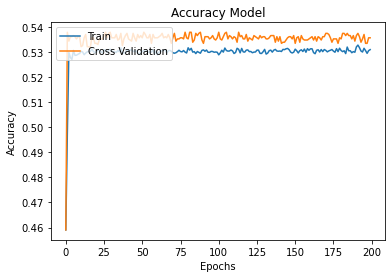

In [2]:
#See how the training went
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Cross Validation'], loc = 'upper left')
plt.show()

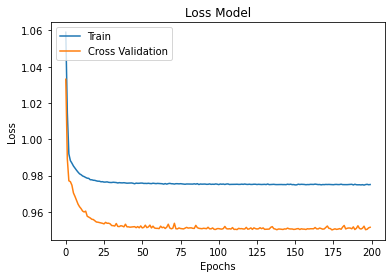

In [3]:
#See how the loss function went 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Cross Validation'], loc = "upper left")
plt.show()

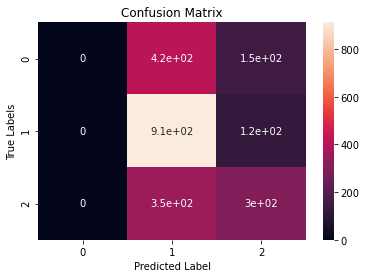

In [4]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
predict_results = model.predict(data_test)

predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(test_labels1, predict_results)
sb.heatmap(cm, annot = True, ax = ax);
ax.set_xlabel('Predicted Label');
ax.set_ylabel("True Labels");
ax.set_title("Confusion Matrix");